**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



In [2]:
### get annotated region folder
txt_fdiry = file.path(FD_RES, "region_annotation")
vec = dir(txt_fdiry)

### assign and show
vec_txt_folder = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [4]:
TXT_FNAME_INP = "matrix.annotation.genome_tss.tsv"

In [5]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = TXT_FNAME_INP
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/matrix.annotation.genome_tss.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/matrix.annotation.genome_tss.tsv 


In [6]:
### loop to import data
lst = lapply(vec_txt_folder, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_annotation", txt_folder, "summary")
    txt_fname = TXT_FNAME_INP
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_folder

### assign and show
lst_dat_region_annot_tss_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 9649    5

$fcc_astarr_macs_input_union
[1] 9788    5



Chrom,ChromStart,ChromEnd,Region,TSS
chr1,28934,29499,chr1:28934-29499,1
chr1,826796,828040,chr1:826796-828040,1
chr1,876493,877795,chr1:876493-877795,1


In [7]:
### loop to import data
lst = lapply(vec_txt_folder, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_closest", txt_folder, "summary")
    txt_fname = "region.summary.genome_tss.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_folder

### assign and show
lst_dat_region_dist2tss_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      8

$fcc_astarr_macs_input_union
[1] 246852      8



Chrom,ChromStart,ChromEnd,Region,Annotation_A,Annotation_B,Distance,Label_TSS_Proximity
chr1,10038,10405,chr1:10038-10405,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,18966,Distal
chr1,14282,14614,chr1:14282-14614,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,14757,Distal
chr1,16025,16338,chr1:16025-16338,fcc_astarr_macs_input_overlap,genome_tss_pol2_rnaseq,13033,Distal


**Import GC content**

In [8]:
lst = list(
    "fcc_astarr_macs_input_overlap" = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.tsv",
    "fcc_astarr_macs_input_union"   = "K562.hg38.ASTARR.macs.KS91.input.rep_all.union.q5.tsv"
    
)
lst = lapply(lst, function(txt_fname){
    ### set file directory
    txt_fdiry = file.path(FD_RES, "region_nuc", "fcc_astarr_macs", "summary")
    txt_fpath = file.path(txt_fdiry, txt_fname)
    
    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_nuc_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      6

$fcc_astarr_macs_input_union
[1] 246852      6



Chrom,ChromStart,ChromEnd,Region,pGC,Length
chr1,10038,10405,chr1:10038-10405,0.523161,367
chr1,14282,14614,chr1:14282-14614,0.578313,332
chr1,16025,16338,chr1:16025-16338,0.587859,313


**Check**

In [9]:
for (txt_folder in vec_txt_folder){
    cat("Region:", txt_folder, "\n")
    dat_region_annot_tss = lst_dat_region_annot_tss_import[[txt_folder]]
    dat_region_dist2tss  = lst_dat_region_dist2tss_import[[txt_folder]]
    dat_region_nuc       = lst_dat_region_nuc_import[[txt_folder]]
    cat("Check:", all(dat_region_annot_tss$Region %in% dat_region_nuc$Region), "\n")
    cat("Check:", all(dat_region_nuc$Region == dat_region_dist2tss$Region),    "\n")
}

Region: fcc_astarr_macs_input_overlap 
Check: TRUE 
Check: TRUE 
Region: fcc_astarr_macs_input_union 
Check: TRUE 
Check: TRUE 


In [10]:
lst = lst_dat_region_annot_tss_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, TSS)
    return(dat)
})

### assign and show
lst_dat_region_annot_tss_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 9649    2

$fcc_astarr_macs_input_union
[1] 9788    2



Region,TSS
chr1:28934-29499,1
chr1:826796-828040,1
chr1:876493-877795,1


In [11]:
lst = lst_dat_region_dist2tss_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::rename(
            "Distance2TSS" = "Distance", 
            "TSS_Proximity" = "Label_TSS_Proximity"
        ) %>% 
        dplyr::select(Region, Distance2TSS, TSS_Proximity)
    return(dat)
})

### assign and show
lst_dat_region_dist2tss_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      3

$fcc_astarr_macs_input_union
[1] 246852      3



Region,Distance2TSS,TSS_Proximity
chr1:10038-10405,18966,Distal
chr1:14282-14614,14757,Distal
chr1:16025-16338,13033,Distal


In [12]:
lst = lst_dat_region_nuc_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::select(Region, pGC, Length)
    return(dat)
})

### assign and show
lst_dat_region_nuc_arrange = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 150042      3

$fcc_astarr_macs_input_union
[1] 246852      3



Region,pGC,Length
chr1:10038-10405,0.523161,367
chr1:14282-14614,0.578313,332
chr1:16025-16338,0.587859,313


In [13]:
lst = lapply(vec_txt_folder, function(txt_folder){
    ###
    dat_region_annot_tss = lst_dat_region_annot_tss_arrange[[txt_folder]]
    dat_region_dist2tss  = lst_dat_region_dist2tss_arrange[[txt_folder]]
    dat_region_nuc       = lst_dat_region_nuc_arrange[[txt_folder]]

    ###
    dat = dat_region_nuc
    dat = dat %>%
        dplyr::left_join(dat_region_dist2tss,  by = "Region") %>%
        dplyr::left_join(dat_region_annot_tss, by = "Region") %>%
        replace(is.na(.), 0) %>%
    return(dat)
})
names(lst) = vec_txt_folder

### assign and show
lst_dat_region_annot_result = lst

In [14]:
for (txt_folder in vec_txt_folder){
    cat("Region:", txt_folder, "\n")
    dat = lst_dat_region_annot_result[[txt_folder]]
    
    ### check missing values
    cat("Missing?", any(is.na(dat)), "\n")
    cat("\n")
    
    ### check TSS annotation and distance
    cat("If D==0:", "\n")
    tmp = dat %>% 
        dplyr::filter(Distance2TSS == 0) %>%
        dplyr::mutate(Note = ifelse(TSS == 1, "TSS==1", "TSS!=1"))
    res = table(tmp$Note)
    print(res)
    cat("\n")
    
    cat("If TSS==1:", "\n")
    tmp = dat %>% 
        dplyr::filter(TSS == 1) %>% 
        dplyr::mutate(Note = ifelse(Distance2TSS == 0, "D==0", "D>0"))
    res = table(tmp$Note)
    print(res)
    cat("\n")
}

Region: fcc_astarr_macs_input_overlap 
Missing? FALSE 

If D==0: 

TSS==1 
  9649 

If TSS==1: 

D==0 
9649 

Region: fcc_astarr_macs_input_union 
Missing? FALSE 

If D==0: 

TSS==1 
  9788 

If TSS==1: 

D==0 
9788 



In [17]:
for (txt_folder in vec_txt_folder){
    cat("Region:", txt_folder, "\n")
    dat = lst_dat_region_annot_result[[txt_folder]]
    cat("Total", nrow(dat), "\n")
    cat("If TSS==1:", "\n")
    tmp = dat %>% dplyr::filter(TSS == 1)
    res = summary(tmp$Distance2TSS/1000)
    print(res)
    cat("\n")
}

Region: fcc_astarr_macs_input_overlap 
Total 150042 
If TSS==1: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Region: fcc_astarr_macs_input_union 
Total 246852 
If TSS==1: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 



In [16]:
head(dat)

Region,pGC,Length,Distance2TSS,TSS_Proximity,TSS
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
chr1:10015-10442,0.522248,427,18929,Distal,0
chr1:14253-14645,0.573980,392,14726,Distal,0
chr1:16015-16477,0.541126,462,12894,Distal,0
chr1:17237-17772,0.614953,535,11599,Distal,0
chr1:28903-29613,0.759155,710,0,Proximal,1
chr1:30803-31072,0.501859,269,1433,Proximal,0


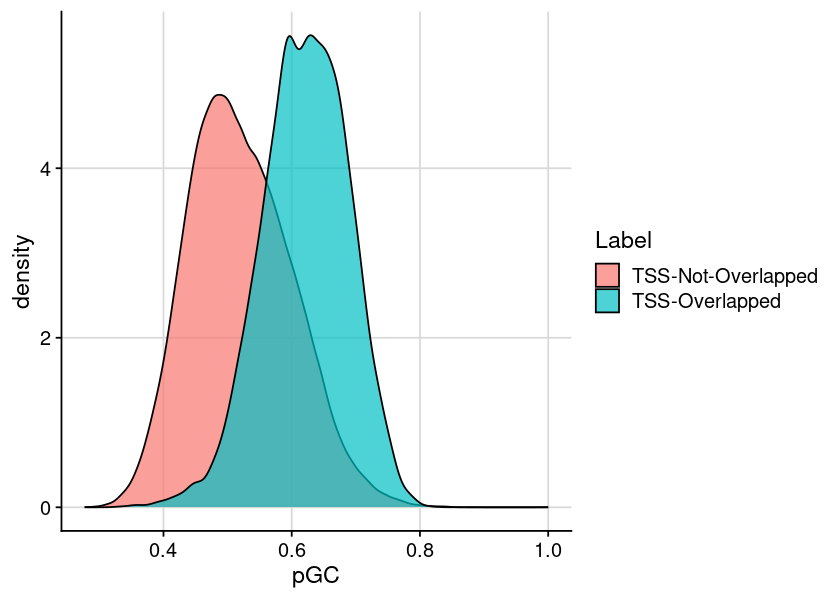

In [25]:
lst = lst_dat_region_annot_result
dat = lst[["fcc_astarr_macs_input_overlap"]]
dat = dat %>% dplyr::mutate(Label = ifelse(TSS, "TSS-Overlapped", "TSS-Not-Overlapped"))

gpt = ggplot(dat, aes(x=pGC, fill=Label)) + 
    geom_density(alpha = 0.7) + 
    theme_cowplot() + 
    background_grid()

options(repr.plot.height = 5, repr.plot.width = 7)
print(gpt)